In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv("housing.csv")
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [36]:
print(dataset.columns)
print(max(dataset['total_rooms']),  max(dataset['median_income']))

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')
39320.0 15.0001


In [12]:
dataset.shape

(20640, 10)

In [15]:
dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].mean(),inplace=True)
dataset.isnull().sum()

C:\Users\akshi\AppData\Local\Temp\ipykernel_23404\597653412.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].mean(),inplace=True)


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

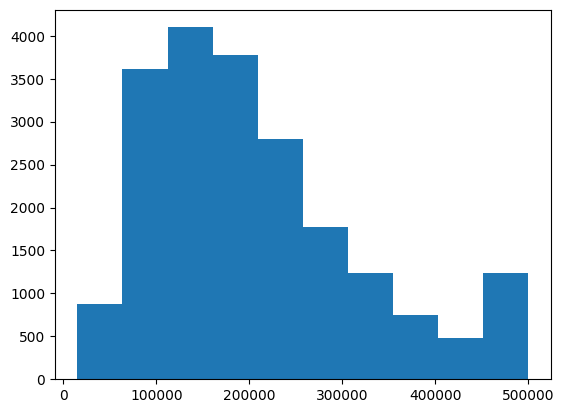

In [50]:
plt.hist(dataset['median_house_value'])
plt.show()

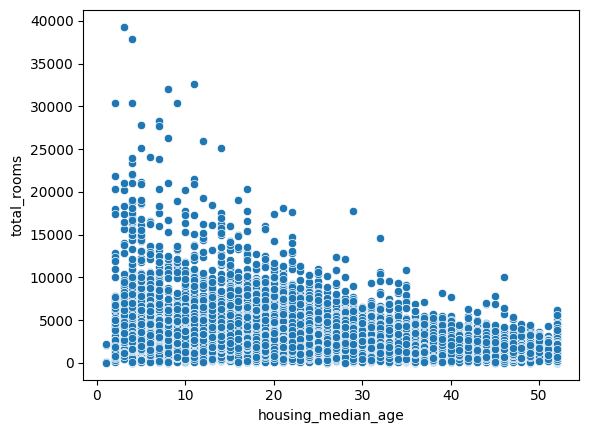

In [32]:
sns.scatterplot(dataset,x='housing_median_age',y='total_rooms')
plt.show()

In [51]:
x=dataset.drop("median_house_value",axis=1)
x.drop("ocean_proximity",axis=1,inplace=True)
y=dataset["median_house_value"]

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train,y_train

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 14196    -117.03     32.71                33.0       3126.0           627.0   
 8267     -118.16     33.77                49.0       3382.0           787.0   
 17445    -120.48     34.66                 4.0       1897.0           331.0   
 14265    -117.11     32.69                36.0       1421.0           367.0   
 2271     -119.80     36.78                43.0       2382.0           431.0   
 ...          ...       ...                 ...          ...             ...   
 11284    -117.96     33.78                35.0       1330.0           201.0   
 11964    -117.43     34.02                33.0       3084.0           570.0   
 5390     -118.38     34.03                36.0       2101.0           569.0   
 860      -121.96     37.58                15.0       3575.0           597.0   
 15795    -122.42     37.77                52.0       4226.0          1315.0   
 
        population  households  median

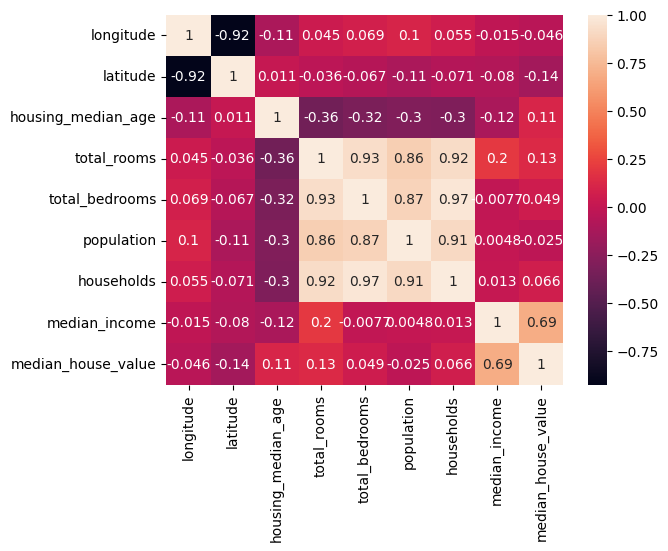

In [53]:
sns.heatmap(data=dataset.corr(numeric_only=True),annot=True)
plt.show()

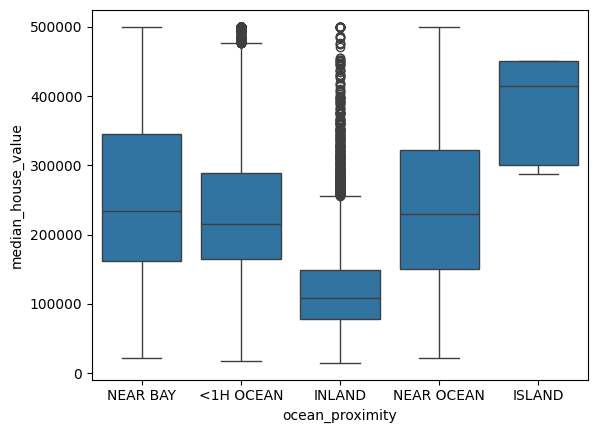

In [54]:
sns.boxplot(x='ocean_proximity',y='median_house_value',data=dataset)
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()

In [57]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [59]:
x.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [58]:
y_pred=lr.predict(x_test)
print(lr.intercept_,lr.coef_)

-3578224.2348177833 [-4.26323917e+04 -4.24500719e+04  1.18280965e+03 -8.18797708e+00
  1.16260128e+02 -3.84922131e+01  4.63425720e+01  4.05384044e+04]


In [63]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
rmse

np.float64(71084.13116794497)

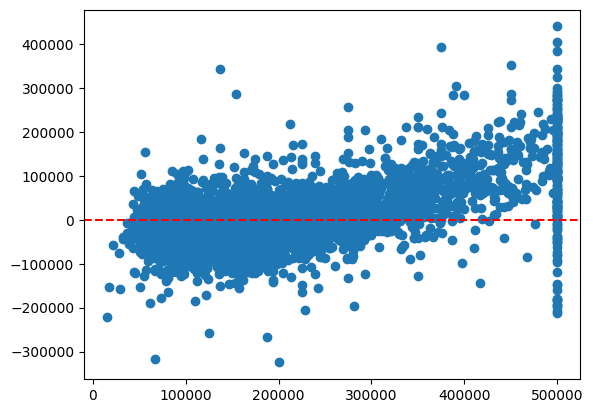

In [75]:
residuals=y_test-y_pred1
plt.scatter(y_test,residuals)
plt.axhline(y=0,color='r',linestyle='--')
plt.show()

In [68]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x_train)
x_train=ss.transform(x_train)
x_test=ss.transform(x_test)
lr1=LinearRegression()

In [69]:
lr.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
y_pred1=lr.predict(x_test)
print(lr.intercept_,lr.coef_)

207194.69373788778 [-85503.21815336 -90698.84880311  14905.90644754 -17805.41850057
  48712.34334124 -43766.49115918  17654.50065911  77194.69946558]


In [73]:
mse=mean_squared_error(y_test,y_pred1)
rmse=np.sqrt(mse)
rmse

np.float64(71084.13116794515)